In [2]:
import pandas as pd
import os
heroes_basic_info = pd.read_csv('./heroes_information.csv')
heroes_power_info = pd.read_csv('./super_hero_powers.csv')

In [560]:
#heroes_basic_info = heroes_basic_info.drop('Unnamed: 0',axis=1)

# Prepaire data

## Drop repeating names of heroes

In [68]:
name_dist = heroes_basic_info.name.value_counts()
name_dist[name_dist>1].index

Index(['Spider-Man', 'Goliath', 'Captain Marvel', 'Atlas', 'Angel', 'Blizzard',
       'Toxin', 'Batgirl', 'Vindicator', 'Firestorm', 'Namor', 'Speedy',
       'Nova', 'Batman', 'Blue Beetle', 'Atom', 'Black Canary'],
      dtype='object')

In [69]:
heroes_basic_info.shape

(734, 11)

In [70]:
#Drop strange spider-man
heroes_basic_info = heroes_basic_info.drop(heroes_basic_info[(heroes_basic_info.name=='Spider-Man') & (heroes_basic_info.Gender=='-')].index[0])

In [71]:
# Find heroes with same names
#heroes_basic_info[heroes_basic_info.name.isin(name_dist[name_dist>1].index)].sort_values(['Weight','Height','Eye color'])

In [72]:
# Drop duplicates base on existance of information
heroes_basic_info = heroes_basic_info.sort_values(['Weight','Height','Eye color']).drop_duplicates(['name','Publisher'],'last')

In [73]:
# Heroes common for several publishers
name_dist = heroes_basic_info.name.value_counts()
heroes_basic_info[heroes_basic_info.name.isin(name_dist[name_dist>1].index)]

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
23,23,Angel,Male,-,Vampire,-,-99.0,Dark Horse Comics,-,good,-99.0
22,22,Angel,Male,blue,-,Blond,183.0,Marvel Comics,-,good,68.0
155,155,Captain Marvel,Female,blue,Human-Kree,Blond,180.0,Marvel Comics,-,good,74.0
47,47,Atlas,Male,brown,Mutant,Red,183.0,Marvel Comics,-,good,101.0
156,156,Captain Marvel,Male,blue,Human,Black,193.0,DC Comics,-,good,101.0
48,48,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,-,bad,126.0


In [74]:
# Drop heroes that are common for several publishers
heroes_basic_info = heroes_basic_info.drop(heroes_basic_info[(heroes_basic_info.name=='Angel') & (heroes_basic_info.Publisher=='Dark Horse Comics')].index[0])
heroes_basic_info = heroes_basic_info.drop(heroes_basic_info[(heroes_basic_info.name=='Captain Marvel') & (heroes_basic_info.Publisher=='DC Comics')].index[0])
heroes_basic_info = heroes_basic_info.drop(heroes_basic_info[(heroes_basic_info.name=='Atlas') & (heroes_basic_info.Publisher=='DC Comics')].index[0])


In [75]:
heroes_basic_info = heroes_basic_info.sort_index()

## Drop missing data & merge heroes_info with powers

In [76]:
# Work with unknown data
heroes_basic_info = heroes_basic_info.drop('Skin color',axis=1)
heroes_basic_info['Race']=heroes_basic_info.Race.replace(['-'],'Unknown')

In [77]:
# Drop heroes with a lot of unknown data(~200 heroes by any of these features)
heroes_basic_info = heroes_basic_info[(heroes_basic_info.Weight!=-99) & 
                                      (heroes_basic_info.Height!=-99) &
                                      (heroes_basic_info['Eye color'] != '-') &
                                      (heroes_basic_info['Hair color'] != '-') &
                                      (heroes_basic_info.Gender != '-') &
                                      (heroes_basic_info.Alignment != '-') &
                                      (~heroes_basic_info.isna().any(1))]
heroes_basic_info.shape

(443, 10)

In [78]:
heroes_basic_info.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
5,5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,bad,122.0


In [79]:
# Merge data
heroes = heroes_basic_info.join(heroes_power_info.set_index('hero_names'),on='name',how='inner')
heroes = heroes.set_index('name')
heroes

,Unnamed: 0,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,0,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,1,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,2,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,3,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,5,Male,blue,Human,No Hair,193.0,Marvel Comics,bad,122.0,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket,728,Male,blue,Human,Blond,183.0,Marvel Comics,good,83.0,False,...,False,False,False,False,False,False,False,False,False,False
Yellowjacket II,729,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,good,52.0,False,...,False,False,False,False,False,False,False,False,False,False
Yoda,731,Male,brown,Yoda's species,White,66.0,George Lucas,good,17.0,True,...,False,False,False,False,False,False,False,False,False,False


In [80]:
# Find unnecessary powers
sums = heroes.sum(axis=0)
print(sums[sums == 0])
heroes = heroes.drop(sums[sums == 0].index,axis=1)
heroes.shape

Omnitrix                 False
Hyperkinesis             False
Thirstokinesis           False
Spatial Awareness        False
Intuitive aptitude       False
Melting                  False
Molecular Dissipation    False
Omnipresent              False
Omniscient               False
dtype: object


(424, 167)

In [ ]:
heroes.to_csv('./Desktop/MMDA/heroes_merged.csv',sep=';')

In [81]:
# Change types
#heroes.Weight = heroes.Weight.astype(int)
#heroes.Height = heroes.Height.astype(int)

In [92]:
heroes = heroes.rename(columns={'Unnamed: 0':'old_id'})

## Download from api basic power stats

In [87]:
# Save ids of heroes from superheroapi
superheroapi_ids = pd.read_excel('./superheroapi_ids.xlsx', header=None, names = ['hero_id','name'])
superheroapi_ids

,hero_id,name
0,1,A-Bomb
1,2,Abe Sapien
2,3,Abin Sur
3,4,Abomination
4,5,Abraxas
...,...,...
726,727,Yellowjacket II
727,728,Ymir
728,729,Yoda
729,730,Zatanna


In [123]:
# Find heroes that are in our db, but not in superheroapi
lost_heroes = np.where(~(heroes_basic_info.name.isin(superheroapi_ids.name)))
heroes_basic_info.iloc[lost_heroes]

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
379,379,Karate Kid,Male,brown,Human,Brown,173.0,DC Comics,-,good,72.0
515,515,Peter Petrelli,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
530,530,Proto-Goblin,Male,green,-,Blond,-99.0,Marvel Comics,-,bad,-99.0


In [11]:
# Load filtered heroes data
heroes = pd.read_csv('./heroes_merged.csv',sep=';',engine='python')
heroes = heroes.reset_index()
heroes

,Name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,...,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Vision - Cryo
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,_,No Hair,185.0,DC Comics,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
4,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,bad,122.0,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,Yellowjacket,Male,blue,Human,Blond,183.0,Marvel Comics,good,83.0,False,...,False,False,False,False,False,False,False,False,False,False
420,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,good,52.0,False,...,False,False,False,False,False,False,False,False,False,False
421,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,good,17.0,True,...,False,False,False,False,False,False,False,False,False,False
422,Zatanna,Female,blue,Human,Black,170.0,DC Comics,good,57.0,False,...,True,False,False,False,False,False,False,False,False,False


In [99]:
# Adjust ids from our dataset and superheroesapi 
heroes.loc[heroes.old_id < 379,'old_id'] = heroes.loc[heroes.old_id < 379,'old_id'] + 1 
heroes.loc[(heroes.old_id < 530)&(heroes.old_id > 516),'old_id'] = heroes.loc[(heroes.old_id < 530)&(heroes.old_id > 516),'old_id'] - 1
heroes.loc[heroes.old_id > 529,'old_id'] = heroes.loc[heroes.old_id > 529,'old_id'] - 2

In [140]:
# Merge ids from our db and superheroesapi 
merged_dbs = superheroapi_ids.merge(heroes, how ='right', left_on=['name','hero_id'],
                                    right_on=['name', 'old_id'])
merged_dbs

,hero_id,name,old_id,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,...,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Vision - Cryo
0,1.0,A-Bomb,1,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,...,False,False,False,False,False,False,False,False,False,False
1,2.0,Abe Sapien,2,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,...,False,False,False,False,False,False,False,False,False,False
2,3.0,Abin Sur,3,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,...,False,False,False,False,False,False,False,False,False,False
3,4.0,Abomination,4,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,...,False,False,False,False,False,False,False,False,False,False
4,6.0,Absorbing Man,6,Male,blue,Human,No Hair,193.0,Marvel Comics,bad,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,727.0,Yellowjacket II,727,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,good,...,False,False,False,False,False,False,False,False,False,False
420,729.0,Yoda,729,Male,brown,Yoda's species,White,66.0,George Lucas,good,...,False,False,False,False,False,False,False,False,False,False
421,730.0,Zatanna,730,Female,blue,Human,Black,170.0,DC Comics,good,...,True,False,False,False,False,False,False,False,False,False
422,731.0,Zoom,731,Male,red,Unknown,Brown,185.0,DC Comics,bad,...,False,False,False,False,False,False,False,False,False,False


In [141]:
# Check nans in merged data
merged_dbs[merged_dbs.hero_id.isna()]

,hero_id,name,old_id,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,...,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Vision - Cryo
423,NaN,Karate Kid,379,Male,brown,Human,Brown,173.0,DC Comics,good,...,False,False,False,False,False,False,False,False,False,False


In [142]:
# Save merged table
merged_dbs.to_csv('./merged_superheroapi.csv',sep=';')

In [161]:
# Loading from superhero-api - often falls(
# URL = 'https://superheroapi.com/api/'
# hero_id = 22
# r = requests.get(url = URL + access_token + '/' + str(hero_id) + '/powerstats') 

# power_stats = r.json()
# power_stats

{'response': 'success',
 'id': '516',
 'name': 'Phantom Girl',
 'intelligence': '38',
 'strength': '10',
 'speed': '23',
 'durability': '28',
 'power': '53',
 'combat': '42'}

In [185]:
# Download from akabab.github.io/superhero-api - this guy continued the work of superhero-api. 
# Unfortunately the original superheroapi.com falls all the time
import requests
URL = 'https://akabab.github.io/superhero-api/api/powerstats/'
power_stats_loaded = []
not_found_ids = []


for i, row in merged_dbs.iterrows():
    print(row.old_id)
    url = URL + str(int(row.old_id)) + '.json'
    r = requests.get(url = url) 
    
    try:
        power_stats = r.json()
        power_stats['id'] = row.old_id
        power_stats_loaded.append(power_stats)
    except:
        print(url, r)
        not_found_ids.append(row.old_id)
    


1
2
3
4
6
8
10
12
13
14
21
https://akabab.github.io/superhero-api/api/powerstats/21.json <Response [404]>
23
25
26
28
29
30
31
35
37
38
39
40
41
42
43
44
45
48
50
https://akabab.github.io/superhero-api/api/powerstats/50.json <Response [404]>
52
53
56
57
61
62
64
https://akabab.github.io/superhero-api/api/powerstats/64.json <Response [404]>
66
68
69
71
72
74
https://akabab.github.io/superhero-api/api/powerstats/74.json <Response [404]>
75
76
81
83
86
https://akabab.github.io/superhero-api/api/powerstats/86.json <Response [404]>
92
93
95
96
98
99
102
103
104
105
106
107
109
110
112
115
118
119
120
125
https://akabab.github.io/superhero-api/api/powerstats/125.json <Response [404]>
130
132
https://akabab.github.io/superhero-api/api/powerstats/132.json <Response [404]>
136
137
138
https://akabab.github.io/superhero-api/api/powerstats/138.json <Response [404]>
140
141
142
145
146
148
149
150
151
156
158
162
163
https://akabab.github.io/superhero-api/api/powerstats/163.json <Response [404]>
1

In [191]:
# Ids that weren't found in this database
len(not_found_ids)

36

In [197]:
# Table of downloaded stats of superheroes
power_stats_loaded = pd.DataFrame.from_dict(power_stats_loaded)
power_stats_loaded = power_stats_loaded.drop_duplicates()
power_stats_loaded

,intelligence,strength,speed,durability,power,combat,id
0,38,100,17,80,24,64,1
1,88,28,35,65,100,85,2
2,50,90,53,64,99,65,3
3,63,80,53,90,62,95,4
4,38,80,25,100,98,64,6
...,...,...,...,...,...,...,...
382,88,10,12,28,12,14,726
383,50,10,35,28,31,28,727
384,88,52,33,25,100,90,729
385,81,10,23,28,100,56,730


In [204]:
# Merge downloaded data and from kaggle tables
full_data = power_stats_loaded.merge(merged_dbs,left_on=['id'],right_on=['old_id'],how='left')
full_data

,intelligence,strength,speed,durability,power,combat,id,hero_id,name,old_id,...,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Vision - Cryo
0,38,100,17,80,24,64,1,1.0,A-Bomb,1,...,False,False,False,False,False,False,False,False,False,False
1,88,28,35,65,100,85,2,2.0,Abe Sapien,2,...,False,False,False,False,False,False,False,False,False,False
2,50,90,53,64,99,65,3,3.0,Abin Sur,3,...,False,False,False,False,False,False,False,False,False,False
3,63,80,53,90,62,95,4,4.0,Abomination,4,...,False,False,False,False,False,False,False,False,False,False
4,38,80,25,100,98,64,6,6.0,Absorbing Man,6,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,88,10,12,28,12,14,726,726.0,Yellowjacket,726,...,False,False,False,False,False,False,False,False,False,False
384,50,10,35,28,31,28,727,727.0,Yellowjacket II,727,...,False,False,False,False,False,False,False,False,False,False
385,88,52,33,25,100,90,729,729.0,Yoda,729,...,False,False,False,False,False,False,False,False,False,False
386,81,10,23,28,100,56,730,730.0,Zatanna,730,...,True,False,False,False,False,False,False,False,False,False


In [206]:
# Drop unnecessary ids
full_data = full_data.drop(['old_id','hero_id','id'],axis=1).set_index('name')
full_data

,intelligence,strength,speed,durability,power,combat,Gender,Eye color,Race,Hair color,...,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Vision - Cryo
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,38,100,17,80,24,64,Male,yellow,Human,No Hair,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,88,28,35,65,100,85,Male,blue,Icthyo Sapien,No Hair,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,50,90,53,64,99,65,Male,blue,Ungaran,No Hair,...,False,False,False,False,False,False,False,False,False,False
Abomination,63,80,53,90,62,95,Male,green,Human / Radiation,No Hair,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,38,80,25,100,98,64,Male,blue,Human,No Hair,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket,88,10,12,28,12,14,Male,blue,Human,Blond,...,False,False,False,False,False,False,False,False,False,False
Yellowjacket II,50,10,35,28,31,28,Female,blue,Human,Strawberry Blond,...,False,False,False,False,False,False,False,False,False,False
Yoda,88,52,33,25,100,90,Male,brown,Yoda's species,White,...,False,False,False,False,False,False,False,False,False,False


In [207]:
# Save full data
full_data.to_csv('./full_superheroes.csv',sep=';')

## Aggregation of super-powers

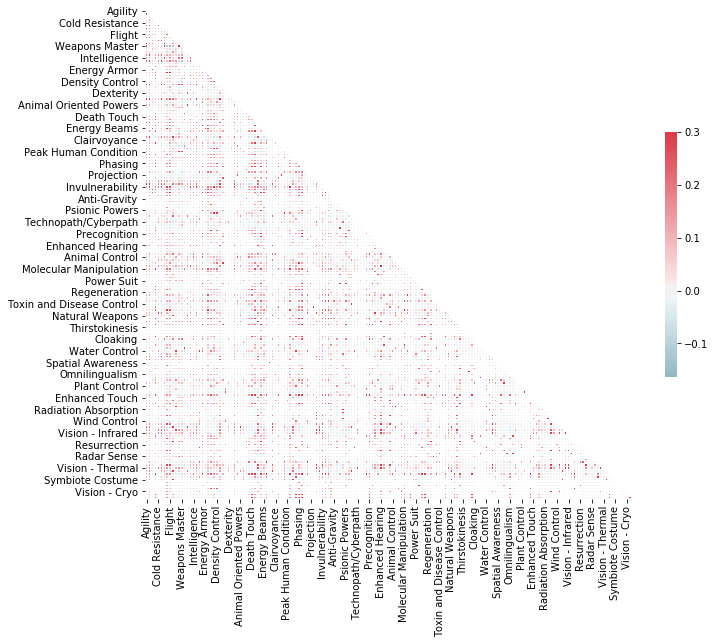

In [225]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Plot correlation of powers
corr = heroes_power_info.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [414]:
# Correlation betweeen powers from threshold 0.4
powers = heroes_power_info.corr().columns.values
for col, row in ((heroes_power_info.corr().abs() > 0.4) & (heroes_power_info.corr().abs() < 1)).iteritems():
    if (len(powers[row.values])>0):
        print(col, powers[row.values], heroes_power_info.corr().abs().loc[col,list(powers[row.values])].values)


Agility ['Stamina' 'Reflexes'] [0.46027358 0.47429021]
Lantern Power Ring ['Energy Armor'] [0.41829603]
Dimensional Awareness ['Teleportation' 'Astral Projection' 'Time Manipulation' 'Reality Warping'] [0.46552895 0.42240093 0.47441774 0.53651725]
Cold Resistance ['Heat Resistance'] [0.59562558]
Durability ['Super Strength'] [0.54570163]
Stealth ['Marksmanship' 'Weapons Master'] [0.44538508 0.51705226]
Danger Sense ['Wallcrawling' 'Web Creation' 'Symbiote Costume'] [0.44304356 0.47285618 0.41351324]
Underwater breathing ['Water Control' 'Sub-Mariner'] [0.40932779 0.42138064]
Marksmanship ['Stealth' 'Weapons Master'] [0.44538508 0.54048181]
Weapons Master ['Stealth' 'Marksmanship'] [0.51705226 0.54048181]
Animal Attributes ['Animal Oriented Powers'] [0.58181003]
Super Strength ['Durability' 'Super Speed'] [0.54570163 0.52616855]
Telepathy ['Telekinesis' 'Astral Projection'] [0.47642467 0.40508136]
Energy Armor ['Lantern Power Ring'] [0.41829603]
Energy Blasts ['Force Fields'] [0.4106224

In [254]:
heroes_power_info = heroes_power_info.set_index('hero_names')

In [323]:
# Now use hierarchical clustering for powers
from sklearn import datasets, cluster
agglo = cluster.FeatureAgglomeration(n_clusters=10)
agglo.fit(heroes_power_info)
agglo.transform(heroes_power_info)
agglo.labels_

array([0, 1, 2, 3, 6, 5, 4, 8, 7, 2, 2, 4, 4, 2, 2, 1, 9, 5, 2, 3, 2, 8,
       2, 3, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 6, 3, 8, 3, 2, 2,
       2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 6, 0, 1, 3, 8, 3, 2, 2,
       2, 2, 3, 2, 2, 2, 6, 2, 2, 2, 2, 3, 2, 2, 6, 2, 2, 2, 2, 2, 3, 2,
       3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 8, 6, 2, 3, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 6, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 3, 2, 2, 2, 6, 2, 2, 6, 2, 6, 6, 2, 2, 2, 2, 2, 6, 2, 2, 2,
       2, 6, 6, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2])

In [324]:
# Print clusters of powers
for i in range(agglo.n_clusters):
    print(i, heroes_power_info.columns[np.where(agglo.labels_ == i)[0]])

0 Index(['Agility', 'Stamina', 'Super Speed', 'Reflexes'], dtype='object')
1 Index(['Accelerated Healing', 'Longevity', 'Invulnerability'], dtype='object')
2 Index(['Lantern Power Ring', 'Danger Sense', 'Underwater breathing',
       'Power Augmentation', 'Animal Attributes', 'Cryokinesis',
       'Energy Armor', 'Duplication', 'Density Control', 'Astral Travel',
       ...
       'Weather Control', 'Web Creation', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=109)
3 Index(['Dimensional Awareness', 'Telepathy', 'Size Changing', 'Teleportation',
       'Telekinesis', 'Magic', 'Dimensional Travel', 'Shapeshifting',
       'Immortality', 'Phasing', 'Astral Projection', 'Energy Constructs',
       'Self-Sustenance', 'Psionic Powers', 'Mind Control', 'Intangibility',
       'Molecular Manipulation', 'Mind Blast', 'Time Travel', 'Illusions',
       'Toxin and

In [393]:
# Create categories of powers
powers_cats = {'Dexterity & speed':['Agility', 'Stamina', 'Super Speed', 'Reflexes', 
                          'Dexterity', 'Speed Force','Jump', 'Wallcrawling'],
 'Healing':['Accelerated Healing', 'Longevity', 'Invulnerability', 'Regeneration',
           'Vitakinesis'],
 'Weapon abilities':['Marksmanship', 'Weapons Master', 'Weapon-based Powers'],
 'Brainpower':['Intelligence', 'Enhanced Memory', 'Omnilingualism','Spatial Awareness'],
 'Energy powers':['Energy Absorption', 'Energy Blasts', 'Energy Beams', 'Force Fields',
       'Energy Manipulation', 'Energy Constructs', 'Lantern Power Ring', 'Qwardian Power Ring',
       'The Force', 'Nova Force'],
 'Sences & Thermal abilities':['Cold Resistance', 'Enhanced Senses', 
       'Enhanced Hearing', 'Heat Resistance',
       'Vision - Telescopic', 'Vision - Microscopic',
       'Vision - Night', 'Vision - Infrared', 'Vision - Heat',
       'Vision - X-Ray', 'Vision - Thermal',
       'Enhanced Sight', 'Echolocation', 'Photographic Reflexes', 'Enhanced Touch',
       'Radar Sense', 'Vision - Cryo'  ],
 'Psychic abilities': ['Telepathy', 'Technopath/Cyberpath', 'Teleportation','Telekinesis', 
                      'Astral Projection','Psionic Powers', 'Mind Control',
                      'Telepathy Resistance','Mind Blast','Illusions','Clairvoyance',
                      'Empathy', 'Precognition', 'Hypnokinesis', 'Insanity',
                       'Mind Control Resistance', 'Intuitive aptitude', 'Possession',
                      'Projection'],
 'Body features': ['Size Changing',  'Shapeshifting','Immortality', 'Phasing',
                   'Self-Sustenance','Super Breath', 'Underwater breathing',
                   'Animal Attributes', 'Duplication', 
                   'Animal Oriented Powers', 'Elasticity', 'Enhanced Smell',
                   'Substance Secretion', 'Adaptation','Gliding', 
                   'Symbiote Costume', 'Natural Weapons', 'Peak Human Condition', 
                   'Electrical Transport', 'Power Suit','Sub-Mariner',
                   'Omnitrix','Phoenix Force','Durability', 'Super Strength'],
 'Space abilities':['Dimensional Travel', 'Reality Warping', 'Time Manipulation',
                   'Time Travel', 'Astral Travel', 'Probability Manipulation', 
                   'Power Cosmic', 'Portal Creation', 'Dimensional Awareness'],
 'Defensive abilities':['Toxin and Disease Resistance', 'Invisibility', 'Intangibility',
                   'Danger Sense', 'Energy Armor','Camouflage', 'Stealth', 
                   'Power Absorption', 'Natural Armor', 'Fire Resistance', 
                    'Changing Armor', 'Cloaking', 'Radiation Immunity', 'Energy Resistance',
                    'Magic Resistance', 'Radiation Absorption', 'Matter Absorption',
                    'Power Nullifier', 'Power Sense'
                   ],
 'Similiar to magic':['Magic', 'Molecular Manipulation', 'Molecular Dissipation', 
                      'Molecular Combustion', 'Density Control', 'Audio Control',
                   'Electrokinesis','Darkforce Manipulation','Death Touch','Hyperkinesis',
                    'Element Control', 'Anti-Gravity', 'Fire Control', 'Radiation Control', 
                    'Animal Control', 'Light Control', 'Summoning', 'Gravity Control', 
                    'Toxin and Disease Control', 'Biokinesis', 'Water Control', 'Magnetism', 
                    'Plant Control', 'Sonar', 'Sonic Scream', 'Melting', 'Terrakinesis', 
                    'Weather Control', 'Web Creation', 'Wind Control', 'Illumination',
                    'Banish', 'Seismic Power', 'Hair Manipulation', 'Thirstokinesis', 
                    'Grim Reaping',  'Elemental Transmogrification', 'Resurrection',
                    'Flight', 'Levitation', 'Cryokinesis', 'Heat Generation', 'Animation',
                    'Power Augmentation'
                   ],
 'God-like abilities':['Omnipotent','Omnipresent','Omniscient', 'Odin Force']}

In [394]:
len(powers_cats)

12

In [395]:
# Load full filtered data
full_data = pd.read_csv('./full_superheroes.csv',engine='python',sep=';')

In [396]:
# Add new columns with aggregated categories of super-powers
for cat_name, cat_powers in powers_cats.items():
    cols = set(full_data.columns).intersection(cat_powers)
    print(cat_name, ':', len(cols), 'from', len(cat_powers))
    full_data[cat_name] = full_data[cols].sum(axis=1)

Dexterity & speed : 8 from 8
Healing : 5 from 5
Weapon abilities : 3 from 3
Brainpower : 3 from 4
Energy powers : 10 from 10
Sences & Thermal abilities : 17 from 17
Psychic abilities : 18 from 19
Body features : 24 from 25
Space abilities : 9 from 9
Defensive abilities : 19 from 19
Similiar to magic : 40 from 44
God-like abilities : 2 from 4


In [411]:
# Create new dataset with only aggregated super-powers
aggregated_data = pd.concat([full_data.loc[:,:'Weight'],full_data.loc[:,'Dexterity & speed':]],axis=1)
aggregated_data = aggregated_data.set_index('name')
aggregated_data

,intelligence,strength,speed,durability,power,combat,Gender,Eye color,Race,Hair color,...,Weapon abilities,Brainpower,Energy powers,Sences & Thermal abilities,Psychic abilities,Body features,Space abilities,Defensive abilities,Similiar to magic,God-like abilities
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,38,100,17,80,24,64,Male,yellow,Human,No Hair,...,0,0,0,0,0,3,0,1,0,0
Abe Sapien,88,28,35,65,100,85,Male,blue,Icthyo Sapien,No Hair,...,2,1,0,2,1,5,0,0,0,0
Abin Sur,50,90,53,64,99,65,Male,blue,Ungaran,No Hair,...,0,0,1,0,0,0,0,0,0,0
Abomination,63,80,53,90,62,95,Male,green,Human / Radiation,No Hair,...,0,1,0,0,0,2,0,0,1,0
Absorbing Man,38,80,25,100,98,64,Male,blue,Human,No Hair,...,0,0,1,2,0,2,0,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket,88,10,12,28,12,14,Male,blue,Human,Blond,...,0,0,0,0,0,2,0,0,0,0
Yellowjacket II,50,10,35,28,31,28,Female,blue,Human,Strawberry Blond,...,0,0,1,0,0,1,0,0,1,0
Yoda,88,52,33,25,100,90,Male,brown,Yoda's species,White,...,2,1,3,0,4,0,0,3,0,0


In [408]:
aggregated_data.dtypes

name                           object
intelligence                    int64
strength                        int64
speed                           int64
durability                      int64
power                           int64
combat                          int64
Gender                         object
Eye color                      object
Race                           object
Hair color                     object
Height                        float64
Publisher                      object
Alignment                      object
Weight                        float64
Dexterity & speed               int64
Healing                         int64
Weapon abilities                int64
Brainpower                      int64
Energy powers                   int64
Sences & Thermal abilities      int64
Psychic abilities               int64
Body features                   int64
Space abilities                 int64
Defensive abilities             int64
Similiar to magic               int64
God-like abi

In [412]:
aggregated_data.to_csv('./aggregated_superheroes.csv',sep=';')

# Work with data

In [114]:
# Load data
hero_agg = pd.read_csv('aggregated_superheroes.csv',sep=';')
print("NaN:", hero_agg.isna().values.any()) # check na
print("Duplicates:", hero_agg.name.duplicated().any()) # check duplicates in names
hero_agg = hero_agg.set_index('name')
hero_agg.head()

NaN: False
Duplicates: False


,intelligence,strength,speed,durability,power,combat,Gender,Eye color,Race,Hair color,...,Weapon abilities,Brainpower,Energy powers,Sences & Thermal abilities,Psychic abilities,Body features,Space abilities,Defensive abilities,Similiar to magic,God-like abilities
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,38,100,17,80,24,64,Male,yellow,Human,No Hair,...,0,0,0,0,0,3,0,1,0,0
Abe Sapien,88,28,35,65,100,85,Male,blue,Icthyo Sapien,No Hair,...,2,1,0,2,1,5,0,0,0,0
Abin Sur,50,90,53,64,99,65,Male,blue,Ungaran,No Hair,...,0,0,1,0,0,0,0,0,0,0
Abomination,63,80,53,90,62,95,Male,green,Human / Radiation,No Hair,...,0,1,0,0,0,2,0,0,1,0
Absorbing Man,38,80,25,100,98,64,Male,blue,Human,No Hair,...,0,0,1,2,0,2,0,3,2,0


In [115]:
# What do we know about Superman?
hero_agg.loc['Superman']

intelligence                          94
strength                             100
speed                                100
durability                           100
power                                100
combat                                85
Gender                              Male
Eye color                           blue
Race                          Kryptonian
Hair color                         Black
Height                               191
Publisher                      DC Comics
Alignment                           good
Weight                               101
Dexterity & speed                      5
Healing                                3
Weapon abilities                       1
Brainpower                             2
Energy powers                          2
Sences & Thermal abilities             9
Psychic abilities                      1
Body features                          4
Space abilities                        0
Defensive abilities                    1
Similiar to magi